# **Authentication and Authorization Tools** #

At AWS, security is always the top priority. 

Two of the most important components of security are authentication and authorization. These answer questions such as “Who are you?” and “What are you permitted to do?”

Unauthorized access, whether malicious or inadvertent, is responsible for a vast percentage of security issues. A common mistake when restricting access is to apply a list of prohibitions to a user or a service. Although this seems a logical approach, the better approach is to start with a blanket prohibition and then grant only those permissions required for specific tasks. This is the principle of least privilege. Worded another way, start with a giant “NO!”, and then give out “Yes" only where and when needed.

In IAM, policies, groups, roles, and endpoints are essential components that work together to control access to AWS resources and services.

## **IAM policies** ##

IAM policies are JSON documents that define permissions for AWS resources and services.

There are two policy types:

- **Identity-based policies:** These policies are attached to IAM users, groups, or roles to define which actions they can perform.
- **Resource-based policies:** These policies are attached to AWS resources like S3 buckets or SNS topics to define which actions principals can perform on that resource.

IAM provides hundreds of pre-made policies that are managed by AWS. These policies cover a wide array of use cases. You can create your own custom policies when a managed policy does not meet your exact needs.

The following example illustrates an IAM policy allowing an operator to use Amazon Data Firehose to ingest data into an S3 bucket. To learn more, choose each of the numbered markers.

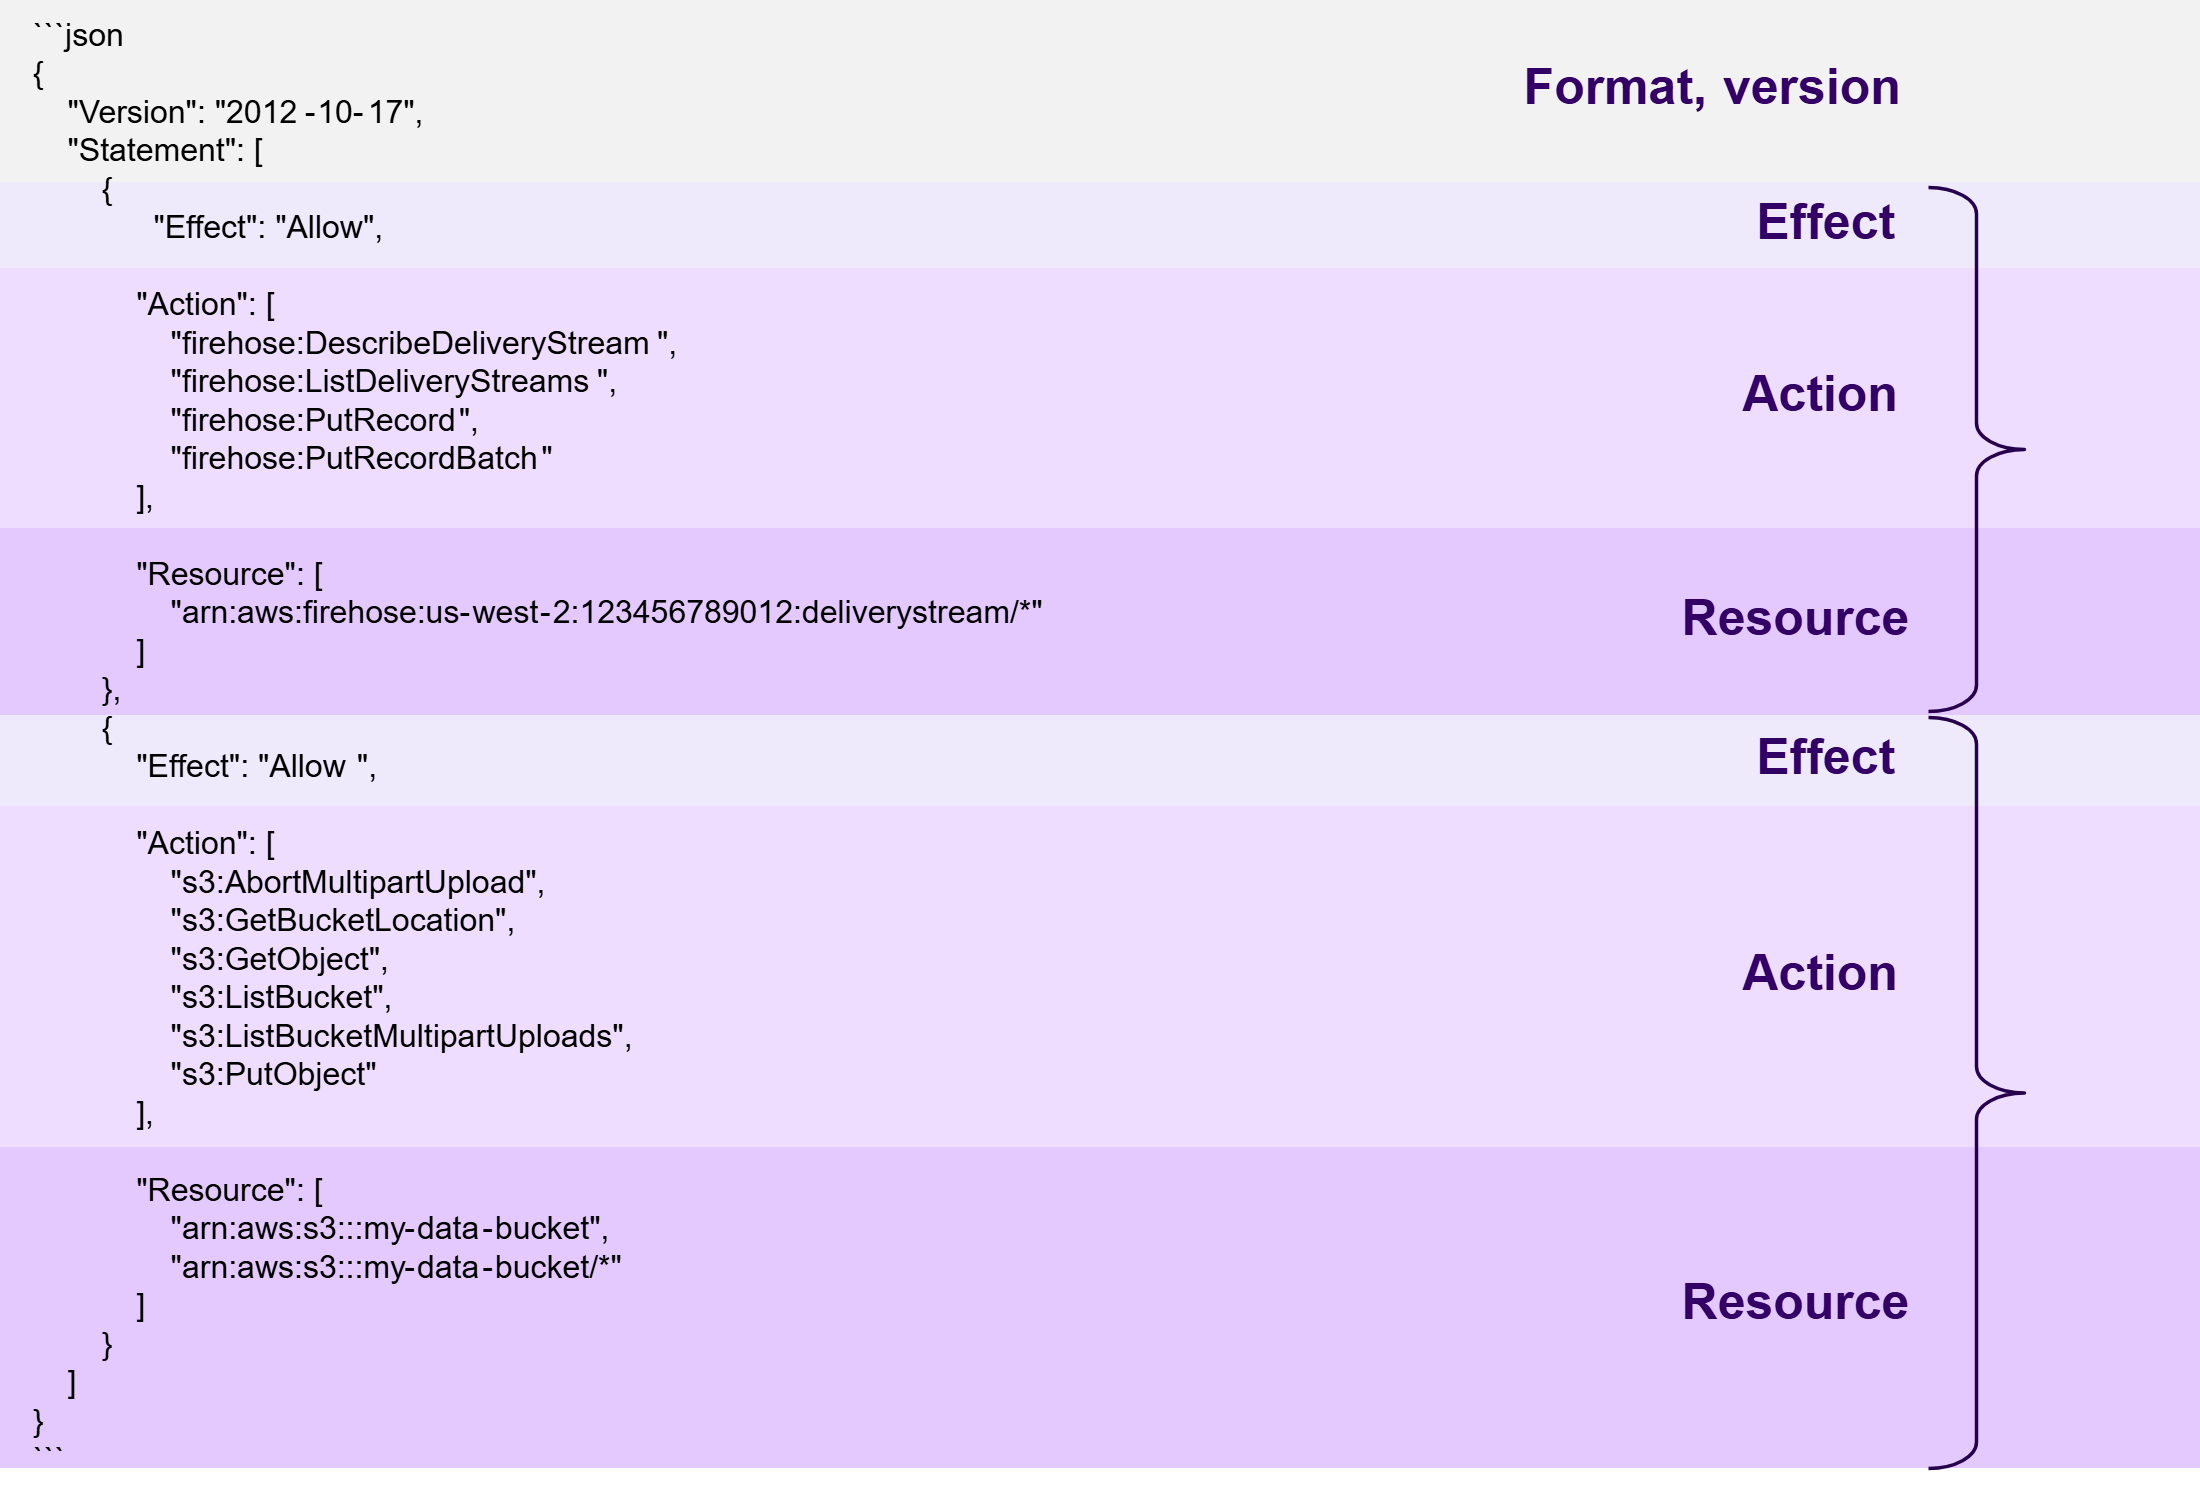

Authorization of a user can be role-based, policy-based, tag-based, or attribute-based.

### **Role-Based** ###
Role-based authorization grants access rights based on the roles or responsibilities of users within an organization.

### **Policy-Based** ###
Policy-based authorization grants access based on predefined policies that specify conditions for access control. Policies are typically set using JSON documents and attached to resources or users. 

### **Tag-Based** ###
Tag-based authorization uses metadata tags assigned to resources to control access based on the tag's attributes. Tags could be department, project, or environment. 

### **Attribute-Based** ###
Attribute-based authorization dynamically evaluates access decisions based on multiple attributes. This includes attributes such as user roles, time of access, location, and device characteristics. 

## **IAM roles** ##

IAM roles are used to grant permissions to users, AWS services, and applications. Roles are similar to user accounts but are not associated with a specific person. Instead, they are intended to be assumed by trusted entities.

Roles have two main use cases:

- **Service roles:** These roles are used by AWS services to perform actions on your behalf. For example, when you create a Lambda function, you need to assign an IAM role to it to grant the necessary permissions for the function to access other AWS resources.
- **Instance roles:** These roles are used by applications running on EC2 instances to access AWS services and resources securely without embedding long-term credentials.
Roles work based on the principle of least privilege. They provide only the necessary permissions to perform the intended tasks.

In the IAM console, you can create a role, and then assign policies to it.
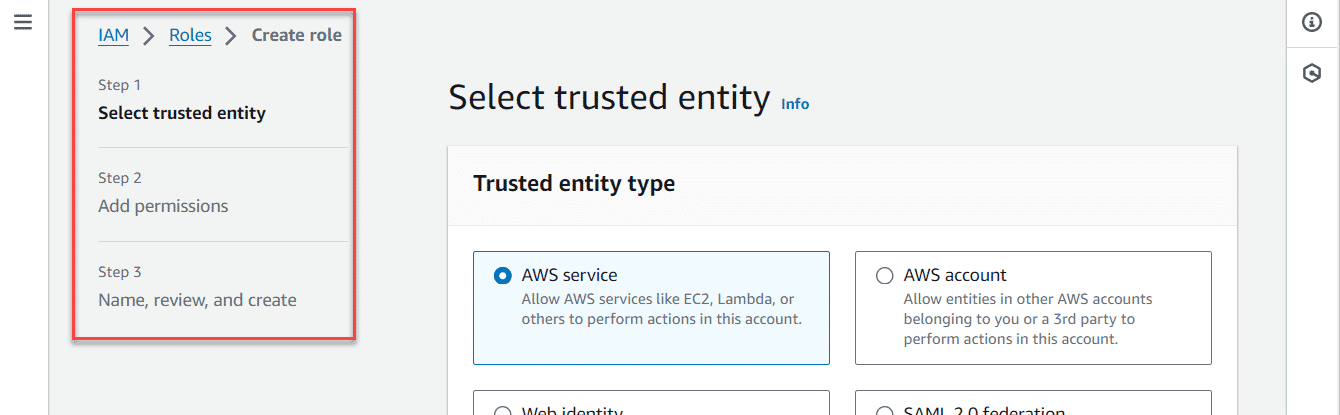

## **IAM endpoints** ##

Endpoints are the entry points for AWS services, such as Amazon S3, Amazon EC2, or DynamoDB.

When you create an IAM policy to grant or deny permissions to an AWS service, you specify the service's endpoint as part of the policy's resource Amazon Resource Name (ARN). Endpoints serve as the location where your applications or services send requests to interact with AWS services.

## **Creating and updating IAM elements** ##

Policies, groups, roles, and endpoints can be created and updated using the AWS Management Console, the AWS Command Line Interface (AWS CLI), and through APIs.
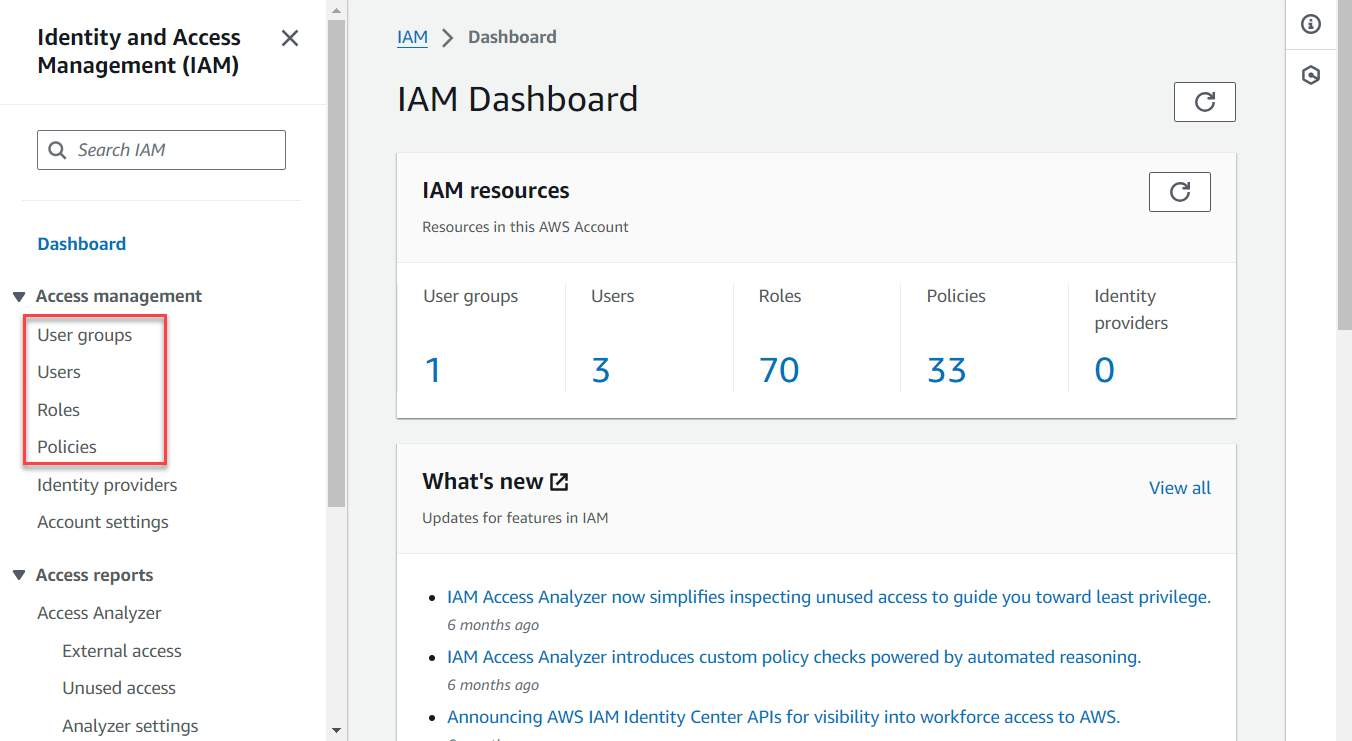

## **Managing secrets** ##

In a well-architected data analytics system, there are (or should be) quite a few secrets. Secrets include sensitive data such as passwords, database credentials, API keys, and encryption-decryption keys.

The security of the system depends utterly on controlling access to these secrets.

That is the primary function of AWS Secrets Manager. It provides a centralized and secure way to manage your secrets throughout their lifecycle and reduces the risk of accidental exposure or unauthorized access.

The following are some of the key features of Secrets Manager:

**Secure storage**
Secrets are encrypted using AWS Key Management Service (AWS KMS) and stored in a highly available and durable manner across multiple Availability Zones.

**Rotation**
Secrets Manager supports automatic rotation of secrets, such as database credentials and API keys, based on a specified schedule or activated manually.

**Access control**
Secrets can be accessed only by authorized principals (users, roles, or services) through IAM policies.

**Auditing**
Secrets Manager provides detailed auditing and logging capabilities to track secret access and changes.

**Centralized management**
Secrets can be centrally managed and shared across multiple applications and services running on AWS or on premises.


Secrets Manager integrates closely with IAM to control access to secrets. IAM policies are used to grant or deny permissions to principals to perform specific actions on secrets, such as retrieving, updating, or rotating them.

Additionally, Secrets Manager supports resource-based policies so you can define permissions directly on the secrets themselves. This provides fine-grained access control.

Overall, Secrets Manager, combined with IAM, provides a comprehensive solution for securely storing, managing, and accessing sensitive data throughout its lifecycle while ensuring that only authorized entities can access and use these secrets.


## **Encryption** ##

Some of the most important secrets in a data analytics system are the cryptographic keys. These keys are essential in protecting the integrity and value of data.

Encryption can be applied to data at rest (in storage) and in transit between storage areas.

You can use AWS KMS to create, manage, and control the cryptographic keys used for data protection. This ensures confidentiality, integrity, and access control.

With AWS KMS, you can create, rotate, disable, and delete encryption keys in a centralized and highly available manner.

Encryption functions are integrated with other AWS services, such as Amazon S3, Amazon Elastic Block Store (Amazon EBS), Amazon Relational Database Service (Amazon RDS), and Amazon Redshift.

You can create IAM roles and policies to grant or deny access to AWS KMS keys and key management operations.

### Step 1 ###

**Create an IAM user or role**
The first step in the workflow is to create an IAM user or role in the AWS Management Console. An IAM user is an entity that can be granted permissions to access AWS resources. A role is a set of permissions that can be assumed by an IAM user or another AWS service.

### Step 2 ###

**Create a Secrets Manager secret**
Next, create a Secrets Manager secret in the AWS Management Console. This secret can store sensitive information such as API keys, database credentials, or encryption keys.

### Step 3 ###

**Create an AWS KMS key**
Create an AWS KMS key in the AWS Management Console. This key can be used to encrypt the secret stored in Secrets Manager.

### Step 4 ###

**Grant IAM user or role access to a Secrets Manager secret**
Grant the IAM user or role access to the secret stored in Secrets Manager using IAM. This will allow the IAM user or role to read or write the secret.

### Step 5 ###

**Rotate keys**
Rotate the encryption keys used to protect the secret stored in Secrets Manager using AWS KMS. This will ensure that the secret remains secure and that the encryption keys are regularly updated.

### Step 6 ###

**Use Secrets Manager to access the secret**
Use the IAM user or role to access the secret stored in Secrets Manager. The secret will be retrieved from Secrets Manager and decrypted using the AWS KMS key.

### Step 7 ###

**Use the secret**
The IAM user or role can then use the secret to access the AWS resources that it grants access to. For example, if the secret contains API keys or database credentials, the IAM user or role can use these keys to authenticate with the respective APIs or databases.

## Summary ##

The AWS service for managing access control is AWS IAM. Secrets are stored in AWS Secrets Manager, which offers secure storage, rotation, access control, auditing, and centralized management. The encryption of secrets is controlled by AWS KMS where you can create, rotate, disable, and delete encryption keys. It is critical to use the principle of least privilege when creating users and assigning roles.